# Market Basket Analaysis using Apriori Algorithm

<img src="https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fmarciaturner%2Ffiles%2F2018%2F01%2FWegmans-Produce-1.jpg" width="800px">

# Importing Libraries

In [42]:
#importing the libraries
import mlxtend as ml
import pandas as pd
import numpy as np

# for importing data visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the Dataset

In [43]:
# reading the dataset

data=pd.read_csv("Groceries.csv")


In [44]:
# let's check the shape of the dataset
data.shape

(9835, 33)

In [45]:
# checking the head of the data
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# checking the tail of the data

data.tail()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,5,chicken,tropical fruit,other vegetables,vinegar,shopping bags,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# checking the column names in the data

data.columns

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')

In [48]:
# checking the random entries in the data

data.sample(10)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
1789,3,whole milk,rolls/buns,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,1,curd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,1,canned beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
671,1,beef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4906,2,specialty bar,house keeping products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6486,2,soap,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1356,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6301,6,pip fruit,whole milk,yogurt,pastry,seasonal products,male cosmetics,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2350,3,sausage,pip fruit,bottled water,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3053,4,beef,other vegetables,margarine,soda,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ____DATA VISUALIZATION______________________

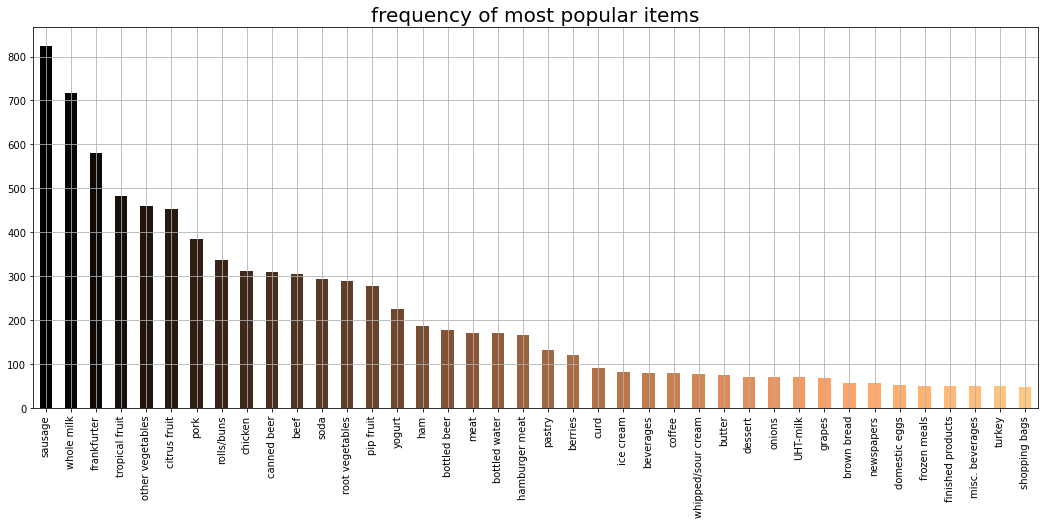

In [49]:
# looking at the frequency of most popular items 
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['Item 1'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

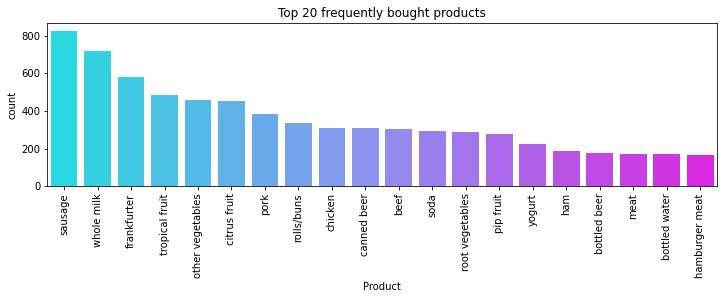

In [50]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize'] = (12, 3)
sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

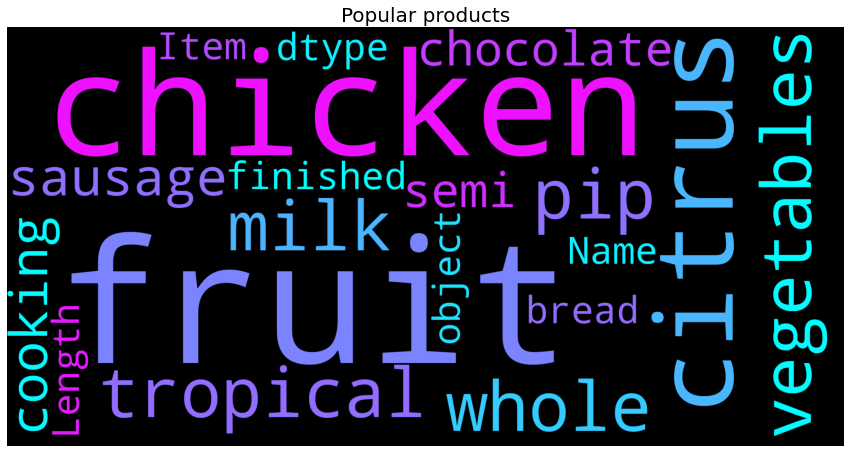

In [52]:
#let's check popular products
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 20, colormap='cool').generate(str(data['Item 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()

# __________________DATA PREPROCESSING________________________

In [53]:
#checking for nan values

data.isnull().values.any()

True

In [54]:
#replacing nan values with 'zero'

data.fillna(0,inplace=True)

### Since there are 9k+ items in the dataset and adding them to the list will take a lot of time, We are just taking the first 3000 items

In [55]:
data=data.iloc[:3000,:]
size=len(data)

### Apriori algorithm takes the list of items that were bought together as input. Hence we need to get each row as a list.

In [57]:
#making each customer shopping items an identical list
#at first we are creating an empty list and then adding the values from the data to it

trans=[]
for i in range(0,size):
    trans.append([str(data.values[i,j]) for j in range(0,33)])
        

In [58]:
#converting it into numpy array

trans=np.array(trans)

In [59]:
# using transaction encoder
#converting it into boolean form(i.e., True or false, 1 or 0 )

from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
data=te.fit_transform(trans)
#converting it into dataframe
data=pd.DataFrame(data,columns=te.columns_)

data.shape

(3000, 193)

In [60]:
#droping the columns from 1 to 32 

data.drop(data.iloc[:,:33],inplace=True,axis=1)

# Using apriori algorithm to derive associations from the datasets

In [61]:
#importing apriori from mlxtend.frequent patterns

from mlxtend.frequent_patterns import apriori

### min_support=(3*7)/3000 i.e., (3 times a day * 7 times a week)/total 

In [62]:
#training the apriori with minimum support of 0.007 & storing it in itemsets 

itemsets=apriori(data, min_support = 0.007, use_colnames = True)
itemsets 

,support,itemsets
0,0.018333,(baking powder)
1,0.053333,(beef)
2,0.032667,(berries)
3,0.029000,(beverages)
4,0.079333,(bottled beer)
...,...,...
646,0.011667,"(whipped/sour cream, yogurt, whole milk)"
647,0.007000,"(fruit/vegetable juice, yogurt, other vegetabl..."
648,0.009333,"(root vegetables, yogurt, other vegetables, wh..."
649,0.007000,"(whole milk, tropical fruit, other vegetables,..."


In [63]:
#sorting to get top 10 frequent itemsets

frequent_itemsets=itemsets.sort_values(by=['support'], ascending=False) 
Top_ten=frequent_itemsets[:10]
Top_ten

,support,itemsets
99,0.256333,(whole milk)
75,0.203333,(rolls/buns)
62,0.189333,(other vegetables)
84,0.174333,(soda)
100,0.139333,(yogurt)
5,0.120667,(bottled water)
76,0.108667,(root vegetables)
82,0.101000,(shopping bags)
92,0.097000,(tropical fruit)
65,0.091667,(pastry)


In [64]:
#importing association rules from mlxtend.frequent_patterns
from mlxtend.frequent_patterns import association_rules

##### Setting the minimum confidence as low to get more relations between the items.

# ASSOCIATION MINING

In [65]:
#creating association rules of the frequent itemsets by setting  minimum confidence as 0.2
result = association_rules(frequent_itemsets,metric="confidence", min_threshold=0.2)
result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.189333,0.256333,0.072667,0.383803,1.497280,0.024134,1.206865
1,(whole milk),(other vegetables),0.256333,0.189333,0.072667,0.283485,1.497280,0.024134,1.131402
2,(rolls/buns),(whole milk),0.203333,0.256333,0.060667,0.298361,1.163956,0.008546,1.059899
3,(whole milk),(rolls/buns),0.256333,0.203333,0.060667,0.236671,1.163956,0.008546,1.043674
4,(yogurt),(whole milk),0.139333,0.256333,0.057333,0.411483,1.605266,0.021618,1.263629
...,...,...,...,...,...,...,...,...,...
625,"(whipped/sour cream, yogurt, whole milk)",(other vegetables),0.011667,0.189333,0.007000,0.600000,3.169014,0.004791,2.026667
626,"(other vegetables, yogurt, whole milk)",(whipped/sour cream),0.024000,0.074667,0.007000,0.291667,3.906250,0.005208,1.306353
627,"(whipped/sour cream, other vegetables, whole m...",(yogurt),0.016333,0.139333,0.007000,0.428571,3.075871,0.004724,1.506167
628,"(whipped/sour cream, yogurt)","(other vegetables, whole milk)",0.019000,0.072667,0.007000,0.368421,5.070014,0.005619,1.468278


above are the all association rules derived from the frequent itemsets. Now we are deriving the top 10 association rules by sorting the rules in ascending order on the basis of confidence.

In [66]:
top_rules=result.sort_values('confidence',ascending=False)[:10]

 # Rules Generated

In [67]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
251,"(tropical fruit, whipped/sour cream)",(whole milk),0.014000,0.256333,0.010667,0.761905,2.972320,0.007078,3.123400
484,"(pip fruit, whipped/sour cream)",(other vegetables),0.010333,0.189333,0.007667,0.741935,3.918673,0.005710,3.141333
436,"(curd, tropical fruit)",(whole milk),0.011000,0.256333,0.008000,0.727273,2.837215,0.005180,2.726778
408,"(domestic eggs, tropical fruit)",(whole milk),0.011667,0.256333,0.008333,0.714286,2.786550,0.005343,2.602833
479,"(root vegetables, onions)",(other vegetables),0.011000,0.189333,0.007667,0.696970,3.681178,0.005584,2.675200
351,"(sugar, other vegetables)",(whole milk),0.013000,0.256333,0.009000,0.692308,2.700810,0.005668,2.416917
587,"(pip fruit, whipped/sour cream)",(whole milk),0.010333,0.256333,0.007000,0.677419,2.642728,0.004351,2.305367
570,"(butter, tropical fruit)",(whole milk),0.011000,0.256333,0.007333,0.666667,2.600780,0.004514,2.231000
333,"(other vegetables, root vegetables, yogurt)",(whole milk),0.014000,0.256333,0.009333,0.666667,2.600780,0.005745,2.231000
379,"(curd, whipped/sour cream)",(whole milk),0.013000,0.256333,0.008667,0.666667,2.600780,0.005334,2.231000


### So, above are the top 10 association rules we have derived from the grocery dataset.
### The top association rule is other whipped/sour cream, tropical fruit -> whole milk with support 0.010 and confidence of 0.761